# Data Collection and Pre-Processing

**Data Collection and Pre-Processing**

In [94]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Libraries
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# My data is in google drive.
f_train_dir ="/content/drive/MyDrive/Project/Dataset Plant Disease/fruit-dataset/fruit-dataset/train"
f_test_dir="/content/drive/MyDrive/Project/Dataset Plant Disease/fruit-dataset/fruit-dataset/test"

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
f_train_samples =get_files(f_train_dir)
f_num_classes=len(glob.glob(f_train_dir+"/*"))
f_test_samples=get_files(f_test_dir)
print(f_num_classes,"Classes")
print(f_train_samples,"Train images")
print(f_test_samples,"Test images")

6 Classes
5334 Train images
1679 Test images


In [ ]:
# Pre-processing data with parameters.
f_train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
f_test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32
f_train_generator=f_train_datagen.flow_from_directory(f_train_dir,target_size=(img_width,img_height),batch_size=batch_size)
f_test_generator=f_test_datagen.flow_from_directory(f_test_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)

Found 5334 images belonging to 6 classes.
Found 1679 images belonging to 6 classes.


In [ ]:
f_train_generator.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

# Model Building



**Model Building**

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Flatten
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import glob
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(f_num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

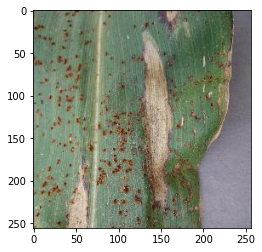

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img1 = load_img('/home/8e0669bb-1959-4f28-b98d-da3c2d85396c___RS_NLB 3678.JPG')
plt.imshow(img1);
#preprocess image
img1 = load_img('/home/8e0669bb-1959-4f28-b98d-da3c2d85396c___RS_NLB 3678.JPG',target_size=(256, 256))
img = img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
validation_generator = f_train_datagen.flow_from_directory(f_train_dir,target_size=(img_height, img_width),batch_size=batch_size)
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
nb_epoch = 10
train=model.fit_generator(f_train_generator,epochs=nb_epoch,steps_per_epoch=f_train_generator.samples//batch_size,validation_data=validation_generator,validation_steps=validation_generator.samples // batch_size,verbose=1)


Found 5334 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
166/166 [==============================] - 1385s 8s/step - loss: 0.7518 - accuracy: 0.7212 - val_loss: 0.3305 - val_accuracy: 0.8869
Epoch 2/10
166/166 [==============================] - 676s 4s/step - loss: 0.2807 - accuracy: 0.9002 - val_loss: 0.1838 - val_accuracy: 0.9386
Epoch 3/10
166/166 [==============================] - 675s 4s/step - loss: 0.2477 - accuracy: 0.9113 - val_loss: 0.1738 - val_accuracy: 0.9405
Epoch 4/10
166/166 [==============================] - 676s 4s/step - loss: 0.1957 - accuracy: 0.9334 - val_loss: 0.1340 - val_accuracy: 0.9516
Epoch 5/10
166/166 [==============================] - 675s 4s/step - loss: 0.1485 - accuracy: 0.9464 - val_loss: 0.2552 - val_accuracy: 0.9228
Epoch 6/10
166/166 [==============================] - 664s 4s/step - loss: 0.1325 - accuracy: 0.9562 - val_loss: 0.0999 - val_accuracy: 0.9644
Epoch 7/10
166/166 [==============================] - 672s 4s/step - loss: 0.1044 - accuracy: 0.9645 - val_loss: 0.0792 - val_accuracy: 0.972

In [ ]:
# Save model
from keras.models import load_model
model.save('fruit.h5')

# IBM Deployment

**IBM Deployment**

In [ ]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 51 kB 740 kB/s 
     |████████████████████████████████| 824 kB 52.4 MB/s 
     |████████████████████████████████| 133 kB 61.3 MB/s 
     |████████████████████████████████| 547 kB 64.8 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=8de5211f749cce223db4e4361c865c7aca195f7315169eda46b82c15299da3b2
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=cbae045d61e3ab8c2ad10b9fc4abc68d24f8de92982a7fee262a6480270d9678
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [ ]:
from ibm_watson_machine_learning import APIClient

In [ ]:
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey" : "oWwMptIWYMhIEjIrCdapePv5oA13N4YrsxfqbO9xC22y"
}

In [ ]:
client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [ ]:
client

In [ ]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------------------------------------  ------------------------
ID                                    NAME                                          CREATED
cd3c5446-b337-4425-bbca-31ad7f4ec0be  Fertilizers Recommendation System Deployment  2022-11-18T23:19:38.565Z
------------------------------------  --------------------------------------------  ------------------------


In [ ]:
space_uid = "cd3c5446-b337-4425-bbca-31ad7f4ec0be"

In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [ ]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")

In [ ]:
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

# Test the Model

**Test the Model**

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
test_dir="/content/drive/MyDrive/Project/Dataset Plant Disease/fruit-dataset/fruit-dataset/test"

In [ ]:
test_dir

'/content/drive/MyDrive/Project/Dataset Plant Disease/fruit-dataset/fruit-dataset/test'

In [ ]:
model=load_model('fruit.h5')


In [ ]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = tf.keras.models.load_model("/content/fruit.h5")

In [ ]:
test_datagen_1=ImageDataGenerator(rescale=1)
test_generator_1=test_datagen_1.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='categorical'
)

Found 1679 images belonging to 6 classes.


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
img=load_img('/content/9f0564fa-2184-4df2-b0b9-bec3f36294e8___R.S_HL 0651 copy 2.jpg')

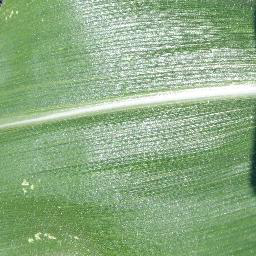

In [ ]:
img

In [ ]:

x=img_to_array(img)
x=np.expand_dims(x,axis=0)


In [ ]:
img=image.load_img(r'/content/9f0564fa-2184-4df2-b0b9-bec3f36294e8___R.S_HL 0651 copy 2.jpg')
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot', 'Apple___healthy', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Peach___Bacterial_spot', 'Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 44ms/step


'Corn_(maize)___Northern_Leaf_Blight'

In [ ]:
model.evaluate(f_test_generator,steps=50)


50/50 [==============================] - 355s 7s/step - loss: 0.1048 - accuracy: 0.9675


[0.104802206158638, 0.9674999713897705]